Principal component analysis (PCA)
==================================

### (a) Energy captured by the first k principal components
energy = the cumulative sum of top-k components variances / sum of all the variances

In [30]:
import numpy as np
import numpy.matlib as npm
from PIL import Image
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

Initialize (load and split) the training and testing data.  
With image size 92x112, train by test ratio as 6 by 4, find the energy with the top 25 eigenvalue/eigenvectors

In [21]:
m = 92
n = 112
K = 25
cv_ratio = 6
X_training =np.zeros((m * n, 40 * cv_ratio))
X_testing = np.zeros((m * n, 40 * (10 - cv_ratio)))
y_training = (npm.repmat(np.arange(40), cv_ratio, 1).T).reshape(40 * cv_ratio, )
y_testing = (npm.repmat(np.arange(40), (10 - cv_ratio), 1).T).reshape(40 * (10 - cv_ratio), )

In [25]:
data_root_dir = './att_faces/'
first_level_dirs = os.listdir(data_root_dir)
tr_cnt, te_cnt = 0, 0
for fd in first_level_dirs:
    if os.path.isdir(data_root_dir + fd):
        ind = np.random.permutation(range(1,11))
        img_dirs = os.listdir(data_root_dir + fd)
        for i in range(cv_ratio):
            img = np.array(Image.open(data_root_dir + fd + '/' + img_dirs[i]))
            X_training[:, tr_cnt] = img.reshape(m * n, order='A')
            tr_cnt += 1
        for i in range(cv_ratio, 10):
            img = np.array(Image.open(data_root_dir + fd + '/' + img_dirs[i]))
            X_testing[:, te_cnt] = img.reshape(m * n, order='A')
            te_cnt += 1


Get the mean of all images over the rows, and substract from all training images

In [34]:
tr_mean_substracted = X_training - np.mean(X_training, axis=1).reshape(m * n, 1)
te_mean_substracted = X_testing - np.mean(X_testing, axis=1).reshape(m * n, 1)

Compute the covarriance matrix and energy

In [35]:
cov = np.dot(tr_mc.T, tr_mean_substracted) / (m * n)
cov_T = np.dot(tr_mc, tr_mean_substracted.T) / (m * n)
varriance = sorted(np.diag(cov_T), reverse=True)
energy = np.cumsum(varriance) / np.sum(varriance)

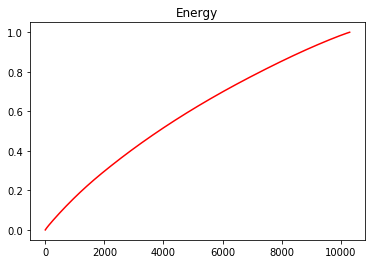

In [41]:
plt.plot(energy, 'r-')
plt.title('Energy')
plt.show()

Eigenvalue and Eigenvector of the covarriance matrix, with decreasing order

In [48]:
eigenvalue, eigenvector = np.linalg.eig(cov)
sort_indices = eigenvalue.argsort()[::-1]

Include only the first k eigenvectors and eigenvalues, for capturing 50% of the energy

In [57]:
evl = eigenvalue[sort_indices]
ev_sum = np.sum(evl)
ev_engy = 0.
ev_cnt = 0
pass_50 = False
for i in range(K):
    ev_engy += evl[i] / ev_sum
    ev_cnt += 1
    if ev_engy >= 0.50 and not pass_50:
        pass_50 = True
        print("{0} components needed to cpature 50% of the energy.".format(ev_cnt))
print("Top K=25 components captured {0}% of the energy.".format(ev_engy*100))

6 components needed to cpature 50% of the energy.
Top K=25 components captured 74.47320344117668% of the energy.


### (b) Top 25 eigenfaces

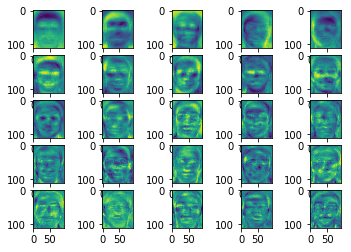

In [88]:
egvlK = np.sqrt(eigenvalue[sort_indices[:K]])
egvtK = np.dot(X_training, np.dot(eigenvector[:, sort_indices[:K]], np.diag(egvlK)))
cnt=0
f, axarr = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        axarr[i, j].imshow(egvtK[:, cnt].reshape(n, m, order='A'))
        cnt += 1        
plt.show()

### (c) Test the PCA model

In [80]:
tr_X_projection = np.dot(egvtK.T, tr_mean_substracted)
te_X_projection = np.dot(egvtK.T, te_mean_substracted)
diff = distance.cdist(tr_X_projection.T, te_X_projection.T, 'minkowski')
# norms = np.linalg.norm(diff, axis=0)
# y_pred = (np.argmin(norms) / 10) + 1
y_pred = y_training[np.argmin(diff, axis=0)]
print(y_pred)
print(y_testing)
accuracy = np.sum(y_testing == y_pred)/len(y_testing)
print("Testing accuracy: {0}%".format(accuracy * 100))

[ 0  0  0  0  1 24  1  1  2  2  2  2  3  3 14  3  4  4  4  4 32 32  5 32
  6  6  7  7  6  6  7  7  8  8 37  8  9  9  3 18 10 10 10 10 11 11 11 11
 12 25 12 12 13 13 30  6 14 14 14 14  4  4  4 28 23 16  1 23 17 13 17 17
 18 18  3 18 19 19 19  2 20 20 20 20  4 15 21 21 22 22 22 22 23 23 23 31
 24 24 24 24 25 25 25 12 26 26 26 11 27 27 27 27 28 26 28  4 29 10 29 29
 30 30 27 30 31 31 31 31 32  2 32 32 33 33 33 33 34 34 14 25 35 35 35 35
 36 36 36 36  8 37 35 35 38 38 38 38 39 39 27 30]
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39]
Testing accuracy: 73.75%

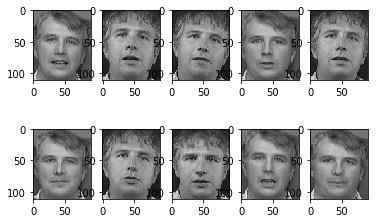

In [87]:
cnt=0
f, axarr = plt.subplots(2, 5)
class_15_path = data_root_dir + 's15/'
img_path_list = os.listdir(class_15_path)
for i in range(2):
    for j in range(5):
        axarr[i, j].imshow(Image.open(class_15_path + img_path_list[cnt]))
        cnt += 1        
plt.show()

Pick class 15 for example, my model mistoken all 4 test case. I think it's because the image of the man in class 15 had various kind of hair style, and emotion representations, and they cover a big portion in the figure.

Reference:  
- [agyorev/Eigenfaces](https://github.com/agyorev/Eigenfaces)  
(I took the idea of the implementation of PCA on att_faces dataset in this github)